# Heart Disease Prediction

### Data Source: https://www.openml.org/d/1498

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
%matplotlib inline

### Atributes
1. Systolic blood pressure (Sbp)
2. Cumulative tobacco consumption (kg)
3. Low density lipoprotein (LDL-cholesterol)
4. Adiposity
5. Family history of heart disease (Present/Absent)
6. Type-A behavior
7. Obesity
8. Current alcohol consumption
9. Age during onset of condition
10. CHD response (Coronary Heart Disease)

## Loading data

In [2]:
df = pd.read_csv('https://www.openml.org/data/get_csv/1592290/phpgNaxZe')
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,Class
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,2
1,144,0.01,4.41,28.61,2,55,28.87,2.06,63,2
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,1
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,2
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,2


In [3]:
columns = ['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'type', 'obesity', 'alcohol', 'age', 'chd']

In [4]:
df.columns = columns
df.head()

,sbp,tobacco,ldl,adiposity,famhist,type,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,2
1,144,0.01,4.41,28.61,2,55,28.87,2.06,63,2
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,1
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,2
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,2


In [5]:
df.describe()

,sbp,tobacco,ldl,adiposity,famhist,type,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,1.584416,53.103896,26.044113,17.044394,42.816017,1.346320
std,20.496317,4.593024,2.070909,7.780699,0.493357,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,1.000000,13.000000,14.700000,0.000000,15.000000,1.000000
25%,124.000000,0.052500,3.282500,19.775000,1.000000,47.000000,22.985000,0.510000,31.000000,1.000000
50%,134.000000,2.000000,4.340000,26.115000,2.000000,53.000000,25.805000,7.510000,45.000000,1.000000
75%,148.000000,5.500000,5.790000,31.227500,2.000000,60.000000,28.497500,23.892500,55.000000,2.000000
max,218.000000,31.200000,15.330000,42.490000,2.000000,78.000000,46.580000,147.190000,64.000000,2.000000


## Scaling data

In [6]:
encoder = LabelEncoder()
df['famhist'] = encoder.fit_transform(df['famhist'])
df['chd'] = encoder.fit_transform(df['chd'])
df.head()

,sbp,tobacco,ldl,adiposity,famhist,type,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,0,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,1,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,0,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,0,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,0,60,25.99,57.34,49,1


## Visualizing features:

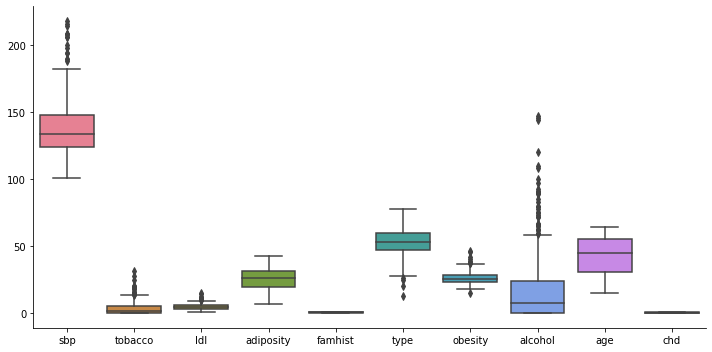

In [8]:
sns.catplot(data=df, orient="v", palette='husl', kind="box", aspect=2.0)

In [9]:
sns.pairplot(df, kind="reg", height=1.8, aspect=1.2)

In [10]:
df.corr()

,sbp,tobacco,ldl,adiposity,famhist,type,obesity,alcohol,age,chd
sbp,1.000000,0.212247,0.158296,0.356500,-0.085645,-0.057454,0.238067,0.140096,0.388771,0.192354
tobacco,0.212247,1.000000,0.158905,0.286640,-0.088601,-0.014608,0.124529,0.200813,0.450330,0.299718
ldl,0.158296,0.158905,1.000000,0.440432,-0.161353,0.044048,0.330506,-0.033403,0.311799,0.263053
adiposity,0.356500,0.286640,0.440432,1.000000,-0.181721,-0.043144,0.716556,0.100330,0.625954,0.254121
famhist,-0.085645,-0.088601,-0.161353,-0.181721,1.000000,-0.044809,-0.115595,-0.080520,-0.239667,-0.272373
type,-0.057454,-0.014608,0.044048,-0.043144,-0.044809,1.000000,0.074006,0.039498,-0.102606,0.103156
obesity,0.238067,0.124529,0.330506,0.716556,-0.115595,0.074006,1.000000,0.051620,0.291777,0.100095
alcohol,0.140096,0.200813,-0.033403,0.100330,-0.080520,0.039498,0.051620,1.000000,0.101125,0.062531
age,0.388771,0.450330,0.311799,0.625954,-0.239667,-0.102606,0.291777,0.101125,1.000000,0.372973
chd,0.192354,0.299718,0.263053,0.254121,-0.272373,0.103156,0.100095,0.062531,0.372973,1.000000


## Defining Variables

In [11]:
X=df[['sbp','tobacco','ldl','adiposity','age','famhist']]
y=df['chd']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 2019)

In [13]:
sc = StandardScaler()
X_std = sc.fit_transform(X)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Predictions with Support Vector Machine:

In [14]:
svm_clf = SVC(C=10, kernel='rbf', gamma='scale')

svm_clf.fit(X_train_std, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Support Vector Machine Metrics:

In [15]:
y_pred_svm = svm_clf.predict(X_test_std)

In [16]:
print(f"Accuracy Score:{accuracy_score(y_test, y_pred_svm)}")

Accuracy Score:0.7266187050359713


In [17]:
print(f"Confusion Matrix\n:{confusion_matrix(y_test, y_pred_svm)}")

Confusion Matrix
:[[79 16]
 [22 22]]


In [18]:
scores = cross_val_score(svm_clf, X_std, y, cv=10)
print(f"Cross Val Scores:{scores}")

Cross Val Scores:[0.65957447 0.63829787 0.7826087  0.65217391 0.58695652 0.56521739
 0.69565217 0.76086957 0.73913043 0.73913043]


In [19]:
print(f"Cross Val Scores Mean:{scores.mean()} / Cross Val Scores Std:{scores.std()}")

Cross Val Scores Mean:0.6819611470860314 / Cross Val Scores Std:0.07002176392582417


## Predictions XGBoost:

In [20]:
xgb = xgb.XGBClassifier(objective="binary:logistic", 
                        max_depth=7,
                        n_estimators=5000,
                        eta=0.3,
                        random_state=2019,
                        )

xgb = xgb.fit(X_train_std, y_train)

### XGBoost metrics

In [21]:
xgb_test_pred = xgb.predict(X_test_std)

In [22]:
print(f"Accuracy Score:{accuracy_score(y_test, xgb_test_pred)}")

Accuracy Score:0.6690647482014388


In [23]:
print(f"Confusion Matrix\n:{confusion_matrix(y_test, xgb_test_pred)}")

Confusion Matrix
:[[70 25]
 [21 23]]


In [24]:
scores = cross_val_score(xgb, X_std, y, cv=10)
print(f"Cross Val Scores:{scores}")

Cross Val Scores:[0.72340426 0.55319149 0.76086957 0.56521739 0.60869565 0.67391304
 0.56521739 0.65217391 0.52173913 0.7826087 ]


In [25]:
print(f"Cross Val Scores Mean:{scores.mean()} / Cross Val Scores Std:{scores.std()}")

Cross Val Scores Mean:0.6407030527289547 / Cross Val Scores Std:0.08768267082564297


## Predictions Multilayer Perceptron:

In [26]:
mlp = MLPClassifier()

In [27]:
parameters = {'solver': ['sgd','lbfgs'],
              'activation': ['logistic', 'relu'],
             'alpha': [1.0, 0.1, 0.01],
             'max_iter':[5000],
             'hidden_layer_sizes':(50,50,50),
             'random_state': [2019]}

In [28]:
grid = GridSearchCV(mlp, parameters, iid=True, cv=5)#iid True, return the average score across folds
grid = grid.fit(X_train_std, y_train)

In [29]:
mlp_clf = grid.best_estimator_

In [30]:
mlp_clf.fit(X_train_std, y_train)

MLPClassifier(activation='logistic', alpha=1.0, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=50, learning_rate='constant',
              learning_rate_init=0.001, max_iter=5000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=2019, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

### Multilayer Perceptron Metrics

In [31]:
y_pred_mlp = mlp_clf.predict(X_test_std)

In [32]:
print(f"Accuracy Score:{accuracy_score(y_test, y_pred_mlp)}")

Accuracy Score:0.7482014388489209


In [33]:
print(f"Confusion Matrix\n:{confusion_matrix(y_test, y_pred_mlp)}")

Confusion Matrix
:[[78 17]
 [18 26]]


In [34]:
scores = cross_val_score(mlp_clf, X_std, y, cv=10)
print(f"Cross Val Scores:{scores}")

Cross Val Scores:[0.72340426 0.68085106 0.76086957 0.7173913  0.67391304 0.67391304
 0.7173913  0.7173913  0.80434783 0.82608696]


In [35]:
print(f"Cross Val Scores Mean:{scores.mean()} / Cross Val Scores Std:{scores.std()}")

Cross Val Scores Mean:0.7295559666975022 / Cross Val Scores Std:0.04993877615129291
